# On chain analysis BTC

In [1]:
import requests
import pandas as pd
import time
import matplotlib.pyplot as plt

In [2]:
#Create a date range
dates = pd.date_range(start = '1/1/2018', end = '2/1/2018')

In [3]:
dates

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06', '2018-01-07', '2018-01-08',
               '2018-01-09', '2018-01-10', '2018-01-11', '2018-01-12',
               '2018-01-13', '2018-01-14', '2018-01-15', '2018-01-16',
               '2018-01-17', '2018-01-18', '2018-01-19', '2018-01-20',
               '2018-01-21', '2018-01-22', '2018-01-23', '2018-01-24',
               '2018-01-25', '2018-01-26', '2018-01-27', '2018-01-28',
               '2018-01-29', '2018-01-30', '2018-01-31', '2018-02-01'],
              dtype='datetime64[ns]', freq='D')

In [4]:
# Now we string format the the time using string comprehension
dates_f = [d.strftime('%Y%m%d') for d in dates]
dates_f

['20180101',
 '20180102',
 '20180103',
 '20180104',
 '20180105',
 '20180106',
 '20180107',
 '20180108',
 '20180109',
 '20180110',
 '20180111',
 '20180112',
 '20180113',
 '20180114',
 '20180115',
 '20180116',
 '20180117',
 '20180118',
 '20180119',
 '20180120',
 '20180121',
 '20180122',
 '20180123',
 '20180124',
 '20180125',
 '20180126',
 '20180127',
 '20180128',
 '20180129',
 '20180130',
 '20180131',
 '20180201']

In [5]:
#Creating list of block
block_list = []

for i,date in enumerate(dates_f):
    url = 'https://chain.api.btc.com/v3/block/date/{}'.format(date)
    # Now making Api request
    r = requests.get(url)

    #Extracting as json file
    output_block = r.json()
    
    #use extend because append will add extra list 
    block_list.extend(output_block['data'])
    time.sleep(10)

In [6]:
r.status_code

200

In [7]:
block_list[0]
len(block_list)

5215

### Data preperation

In [8]:
clean_block_list = [[x['timestamp'], x['height'], x['tx_count']] for x in block_list]
clean_block_list.head(5)

In [9]:
#crete dataframe
df = pd.DataFrame(clean_block_list, columns = ['timestamp','height','tx_count'])

In [10]:
df.head()

,timestamp,height,tx_count
0,1514850785,502116,2598
1,1514849945,502115,2375
2,1514848457,502114,2719
3,1514847391,502113,1971
4,1514846766,502112,1062


In [11]:
df['timestamp'] = pd.to_datetime(df['timestamp'], unit = 's').dt.strftime('%D')
df

,timestamp,height,tx_count
0,01/01/18,502116,2598
1,01/01/18,502115,2375
2,01/01/18,502114,2719
3,01/01/18,502113,1971
4,01/01/18,502112,1062
...,...,...,...
5210,02/01/18,507020,1744
5211,02/01/18,507019,2530
5212,02/01/18,507018,2147
5213,02/01/18,507017,2803


In [12]:
df_new = df.groupby('timestamp').agg(
    numblock = pd.NamedAgg(column= 'height', aggfunc = pd.Series.nunique),
    numTx = pd.NamedAgg(column = 'tx_count', aggfunc = pd.Series.sum)
)
df_new.head(5)


,numblock,numTx
timestamp,,
01/01/18,156,241757
01/02/18,171,340980
01/03/18,157,395963
01/04/18,168,425008
01/05/18,143,342707


### Analysing number of blocks and **transactions**

C:\Users\Syed Nabeel\AppData\Local\Temp\ipykernel_11716\1553170982.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(df_new.index, rotation = 'vertical')


Text(0, 0.5, 'Number of transactions')

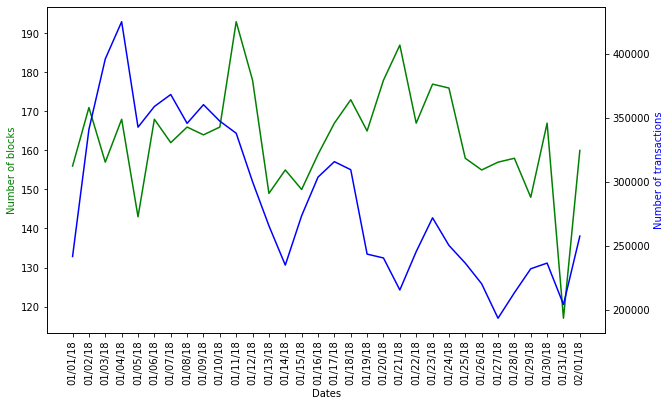

In [15]:
fig, ax1 = plt.subplots()
plt.rcParams["figure.figsize"] = (12,6)

ax2 = ax1.twinx()
ax1.plot(df_new.index, df_new['numblock'], 'g-')
ax2.plot(df_new.index, df_new['numTx'], 'b-')

ax1.set_xlabel('Dates')
ax1.set_xticklabels(df_new.index, rotation = 'vertical')
ax1.set_ylabel('Number of blocks', color='g')
ax2.set_ylabel('Number of transactions', color='b')
